In [31]:
import pandas as pd
import numpy as np

In [2]:
ds_headbrain=pd.read_csv("Headbrain.csv")
ds_headbrain

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


### Checking null values

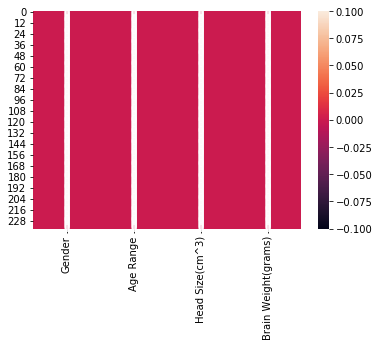

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ds_headbrain.isnull(),annot=True)
plt.show()

In [4]:
ds_headbrain.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

### Checking Outliers

In [5]:
from scipy.stats import zscore

In [6]:
z_score=abs(zscore(ds_headbrain))
print(ds_headbrain.shape)

(237, 4)


In [7]:
ds_headbrain_final=ds_headbrain.loc[(z_score<3).all(axis=1)]
print(ds_headbrain_final.shape)

(236, 4)


### Bivariate Analysis

In [8]:
#Checking change in Brain Weight when change in Head Size

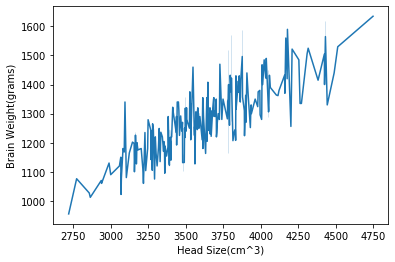

In [9]:
sns.lineplot(x=ds_headbrain["Head Size(cm^3)"],y=ds_headbrain["Brain Weight(grams)"],data=ds_headbrain)
plt.show()

In [10]:
#Checking average brain size according to the gender

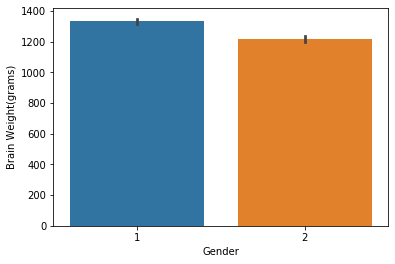

In [11]:
sns.barplot(x=ds_headbrain["Gender"],y=ds_headbrain["Brain Weight(grams)"],data=ds_headbrain)
plt.show()

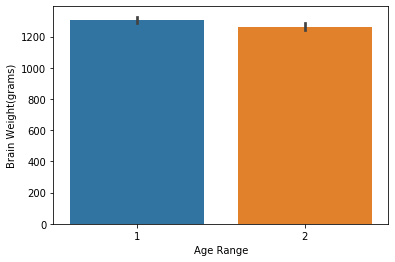

In [12]:
sns.barplot(x=ds_headbrain["Age Range"],y=ds_headbrain["Brain Weight(grams)"],data=ds_headbrain)
plt.show()

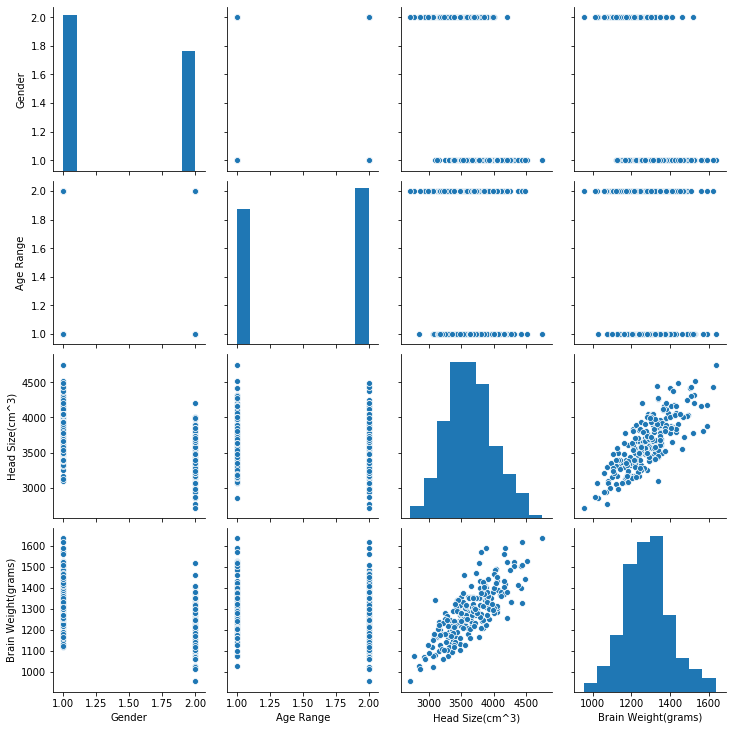

In [13]:
sns.pairplot(ds_headbrain)

In [14]:
ds_headbrain.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


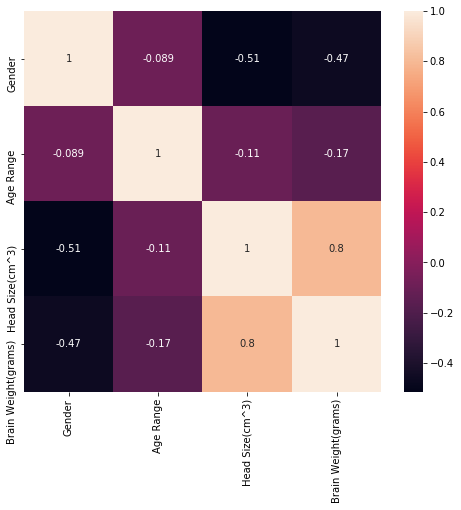

In [15]:
corr_hmap=ds_headbrain.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Checking Skewness

In [16]:
ds_headbrain.skew() #the below skewness is acceptable as the range for all the variable is beyween +1 and -1

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

### Plotting x and y 

In [17]:
x=ds_headbrain[["Head Size(cm^3)"]]
x

,Head Size(cm^3)
0,4512
1,3738
2,4261
3,3777
4,4177
...,...
232,3214
233,3394
234,3233
235,3352


In [18]:
y=ds_headbrain[["Brain Weight(grams)"]]
y

,Brain Weight(grams)
0,1530
1,1297
2,1335
3,1282
4,1590
...,...
232,1110
233,1215
234,1104
235,1170


### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

### Generating Best Random_State

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [22]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    re=LinearRegression()
    re.fit(x_train,y_train)
    y_pred=re.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random_state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr    
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random_state: 42 is: 0.7149168473012073
r2_score corresponding to random_state: 43 is: 0.6404165530671617
r2_score corresponding to random_state: 44 is: 0.6530109688762358
r2_score corresponding to random_state: 45 is: 0.6939862623941999
r2_score corresponding to random_state: 46 is: 0.5332650244375814
r2_score corresponding to random_state: 47 is: 0.6201411206780885
r2_score corresponding to random_state: 48 is: 0.6851449361873334
r2_score corresponding to random_state: 49 is: 0.6433491336855988
r2_score corresponding to random_state: 50 is: 0.7683161771318533
r2_score corresponding to random_state: 51 is: 0.5935686929145347
r2_score corresponding to random_state: 52 is: 0.6342022687682458
r2_score corresponding to random_state: 53 is: 0.5909146568147446
r2_score corresponding to random_state: 54 is: 0.613033190538937
r2_score corresponding to random_state: 55 is: 0.5884150240645216
r2_score corresponding to random_state: 56 is: 0.7399588791116045
r2_score co

### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.4936984443261272

### Re_testing using best Random_State

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.20)
re=LinearRegression()
re.fit(x_train,y_train)
y_pred=re.predict(x_test)
print("r2 score is :",(r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean_Absolute_Error is :",mean_absolute_error(y_test,y_pred))

r2 score is : 0.7683161771318533
RMSE is : 60.367734354767975
Mean_Absolute_Error is : 47.31486358552996


### Saving the model

In [35]:
import joblib

In [36]:
joblib.dump(re,"re_headbrain.pkl")

['re_headbrain.pkl']